<img src="./lecture_image/00_title.png">

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[6차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
        
○ ROI (Region of Image)를 자르고 표시하는 방법에 대해 학습한다.<br>
○ 한글을 출력하는 방법에 대해 학습한다.<br>
○ 비트 연산 및 크로마 키(Chroma key) 합성으로 이미지를 합성하는 방법을 학습한다.

</font></td></tr>   
</table>

# 픽셀/블록 기반 이미지 처리

## ROI (Region of Image) 자르기

- ROI (Region of Image) 
   - 관심영역 - 이미지에 우리가 필요한 부분 (얼굴, 눈 ...)
   
<img src="./lecture_image/06_roi.png" width=30%>  


- <font color=red>img[200:370, 200:350]</font>

<img src="./lecture_image/06_roi2.png" width=60%>  


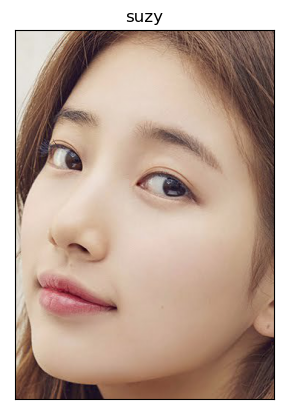

In [10]:
import cv2
import matplotlib.pyplot as plt


img = cv2.imread("./image/suzy.jfif", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#축 눈금을 제거
plt.xticks([]); plt.yticks([])

#그래프 제목
plt.title("suzy")
plt.imshow(img[100:600,150:500])  #넘파이 어레이니까 슬라이싱으로 자르면 됨

## ROI에 도형 그리기

- <font color=red>cv2.line(배경이미지, 시작점좌표, 끝점좌표, 색상, 선두께)</font> : 직선 그리기

<img src="./lecture_image/06_line.png" width=40%>  

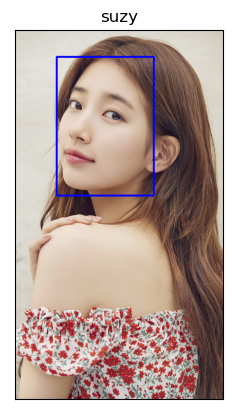

In [31]:


img = cv2.imread("./image/suzy.jfif", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img2 = cv2.line(img, (150, 100),(150, 600),(0,0,255), 6)
img2 = cv2.line(img, (150, 600),(500, 600),(0,0,255), 6)
img2 = cv2.line(img, (500, 600),(500, 100),(0,0,255), 6)
img2 = cv2.line(img, (500, 100),(150, 100),(0,0,255), 6)

#축 눈금을 제거
plt.xticks([]); plt.yticks([])
#그래프 제목
plt.title("suzy")
plt.imshow(img2)



- <font color=red>cv2.circle(배경이미지, 중심좌표, 반지름, 색상, 선두께)</font> : 원 그리기

<img src="./lecture_image/06_circle.png" width=20%>  

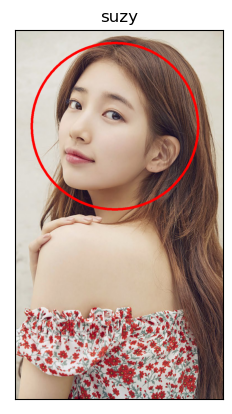

In [68]:
img = cv2.imread("./image/suzy.jfif", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img3 = cv2.circle(img, (360, 350),300,(255,0,0), 8)
# img3 = cv2.circle(img, (340, 350),270,(0,0,255), -1)

#축 눈금을 제거
plt.xticks([]); plt.yticks([])
#그래프 제목
plt.title("suzy")
plt.imshow(img3)

- <font color=red>cv2.rectangle(배경이미지, 좌상단점좌표, 우하단점좌표, 색상, 선두께)</font> : 사각형 그리기

<img src="./lecture_image/06_rectangle.png" width=30%>  

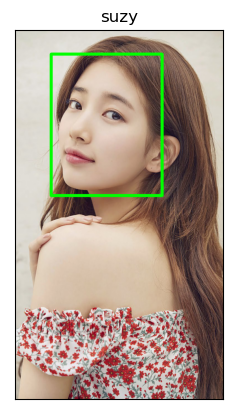

In [82]:
img = cv2.imread("./image/suzy.jfif", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img4 = cv2.rectangle(img, (130, 90),(530, 600),(0,255,0), 10)

#축 눈금을 제거
plt.xticks([]); plt.yticks([])
#그래프 제목
plt.title("suzy")
plt.imshow(img4)

- <font color=red>cv2.ellipse(배경이미지, 중심좌표, 장축/단축 반지름, 기울기, 호의시작각, 호의 종료각, 색상, 선두께)</font> : 타원 그리기

<img src="./lecture_image/06_ellipse.png" width=30%>  

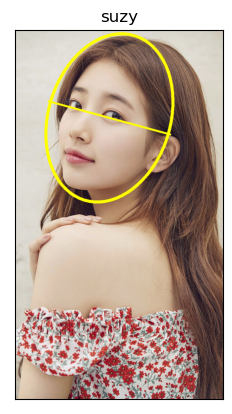

In [137]:
img = cv2.imread("./image/suzy.jfif", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img5 = cv2.ellipse(img, (340, 320),(220,310), 17, 0, 360, (255,255,0), 10)
img5 = cv2.line(img, (120, 260),(560, 380),(255,255,0), 6)

#축 눈금을 제거
plt.xticks([]); plt.yticks([])
#그래프 제목
plt.title("suzy")
plt.imshow(img5)

- <font color=red>cv2.putText(배경이미지, 출력내용, 출력시작좌표, 폰트, 크기, 색상, 굵기)</font> : 텍스트 그리기

<img src="./lecture_image/06_text.png" width=30%>  

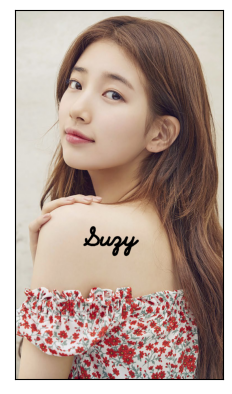

In [167]:
img = cv2.imread("./image/suzy.jfif", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img6 =cv2.putText(img, 'Suzy', (250, 850) , cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 3, (0,0,0), 8)
#축 눈금을 제거
plt.xticks([]); plt.yticks([])
#그래프 제목
plt.imshow(img6)

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>○ 다음과 같이 이미지에 ROI 영역을 표시하고 이름을 출력해보자.</font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;">
        <img src="./lecture_image/06_ryan.png" width=20%></td></tr>   
</table>

## 한글 출력하기

- c:/Windows/Fonts 폴더에서 사용할 폰트를 현재 폴더에 fonts 폴더를 생성하고 복사한다


- <font color=red>font = ImageFont.truetype("fonts/gulim.ttc", 30)</font> : 사용할 폰트와 크기를 가져온다

- <font color=red>img_pil = Image.fromarray(img)</font> : array 이미지를 PIL 이미지로 변환

- <font color=red>draw = ImageDraw.Draw(img_pil)</font> : PIL 이미지를 그림

- <font color=red>draw.text((200, 20), "레나 이미지", font=font, fill=(0, 0, 255, 0))</font> : 이미지에 텍스트를 그림

- <font color=red>img = np.array(img_pil)</font> : PIL 이미지를 numpy 배열로 변환

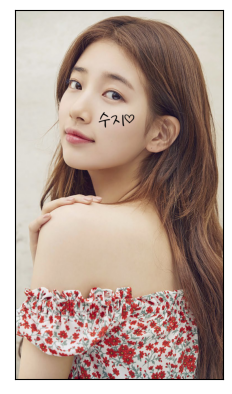

In [282]:
import cv2
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("./image/suzy.jfif", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 폰트 가져오기
font = ImageFont.truetype("./image/나눔손글씨 다행체.ttf", 70) 
# 원본 이미지
img_pil = Image.fromarray(img)
# 변환된 이미지ㅡㄹ 캔버스에 그려준다.
draw = ImageDraw.Draw(img_pil) 
# 여기에 폰트를 그린 이미지에 얹어준다.
# 시작좌표, 출력내용, 폰트, 색상 (RGBA) -> A는 투명도?
draw.text((300, 350), "수지♡", font=font, fill=(0, 0, 0, 0))
#이미지를 넘파이 배열로 변환
img7 = np.array(img_pil)


#축 눈금을 제거
plt.xticks([]); plt.yticks([])
plt.imshow(img7)

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>○ 다음과 같이 다른 폰트의 한글을 출력해보자.</font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;">
        <img src="./lecture_image/06_ryan2.png" width=20%></td></tr>   
</table>

# 이미지 합성하기

## 비트 연산을 이용해서 합성하기

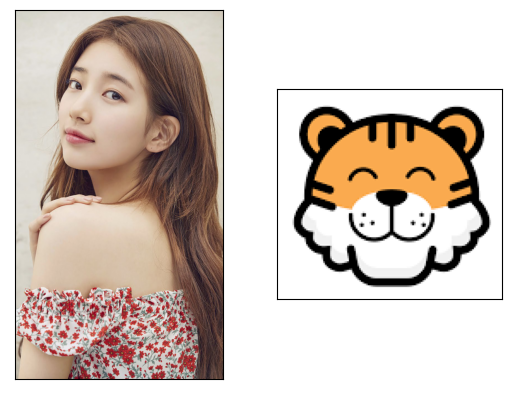

In [283]:
import cv2
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("./image/suzy.jfif", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

tg_img = cv2.imread("./image/tiger.png", cv2.IMREAD_COLOR)
tg_img = cv2.cvtColor(tg_img, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.xticks([]); plt.yticks([])
plt.imshow(img)
plt.subplot(1,2,2)
plt.xticks([]); plt.yticks([])
plt.imshow(tg_img)

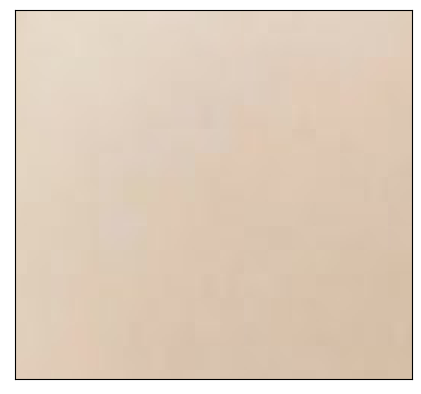

In [284]:
import cv2
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import matplotlib.pyplot as plt

# 이미지가 올라갈 원본이미지 부분을 잘라낸다.
rows, cols, channels = tg_img.shape
roi = img[800:rows+800, 100:cols+100]

plt.xticks([]); plt.yticks([])
plt.imshow(roi)

- <font color=red>cv2.bitwise_not(mask)</font>
  - mask는 흑백이미지여야 함
  - 0을 255로 255롤 0으로 변환 (반전)

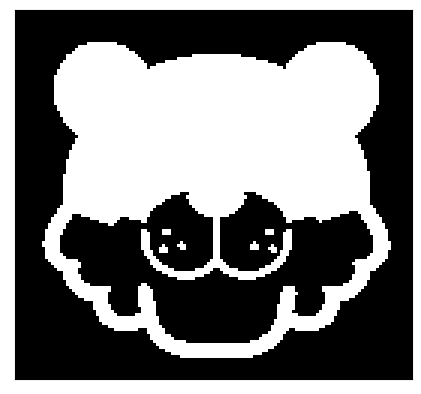

In [285]:
import cv2
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import matplotlib.pyplot as plt

tg_img_gray = cv2.cvtColor(tg_img, cv2.COLOR_BGR2GRAY)
_, tg_mask = cv2.threshold(tg_img_gray, 200, 255, cv2.THRESH_BINARY)
_, tg_mask_bin = cv2.threshold(tg_img_gray, 200, 255, cv2.THRESH_BINARY_INV) #INV반전이미지


plt.xticks([]); plt.yticks([])
plt.imshow(tg_mask_bin, cmap='gray')



- <font color=red>cv2.bitwise_and(src1, src2, mask)></font> : mask의 값이 아닌 부분만 src1과 src2를 AND 연산
  - mask는 흑백이미지여야 함
  - mask 값이 0인 부분 (검정)은 연산되지 않고 검정색 부분 그대로 놓여짐

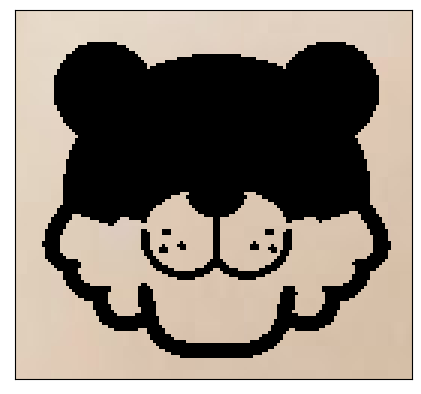

In [286]:
#이미지 합성 시 들어갈 자리 마크업

import cv2
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import matplotlib.pyplot as plt

img_bg = cv2.bitwise_and(roi, roi, mask=tg_mask)

plt.xticks([]); plt.yticks([])
plt.imshow(img_bg)
plt.show()

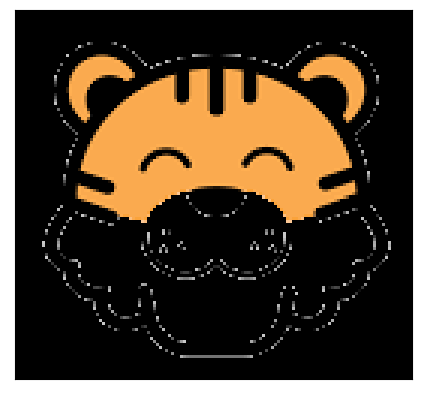

In [287]:
import cv2
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import matplotlib.pyplot as plt

#호랑이 이미지 에서 원본 이미지에 오라갈 부분만 추출
img_fg = cv2.bitwise_and(tg_img, tg_img, mask=tg_mask_bin)
plt.xticks([]); plt.yticks([])
plt.imshow(img_fg)
plt.show()

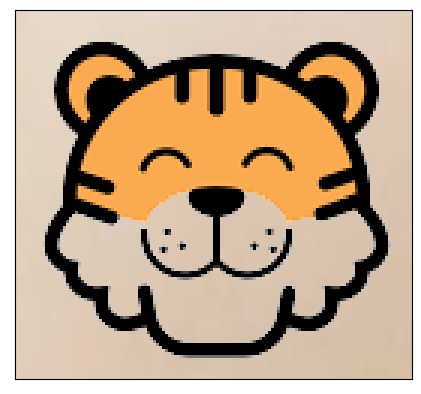

In [288]:
# bg_img에 fg_img 합성

img_bg = cv2.add(img_bg, img_fg)

plt.xticks([]); plt.yticks([])
plt.imshow(img_bg)
plt.show()

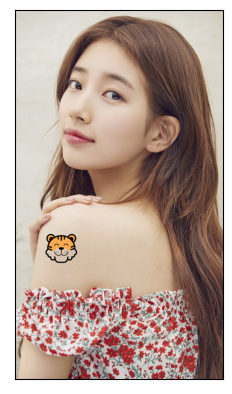

In [294]:
#원본 이미지에 img_bg를 합성

import cv2
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import matplotlib.pyplot as plt

rows, cols, channels = tg_img.shape
img[800:rows+800, 100:cols+100] = img_bg

plt.xticks([]); plt.yticks([])
# plt.title("KIA TIGERS")
plt.imshow(img)

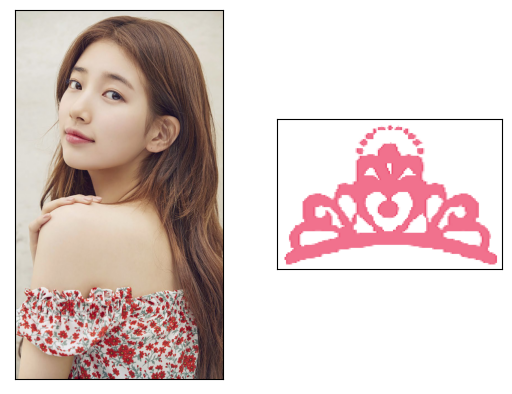

In [458]:
import cv2
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("./image/suzy.jfif", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

hat_img = cv2.imread("./image/tiara.png", cv2.IMREAD_COLOR)
hat_img = cv2.cvtColor(hat_img, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.xticks([]); plt.yticks([])
plt.imshow(img)
plt.subplot(1,2,2)
plt.xticks([]); plt.yticks([])
plt.imshow(hat_img)

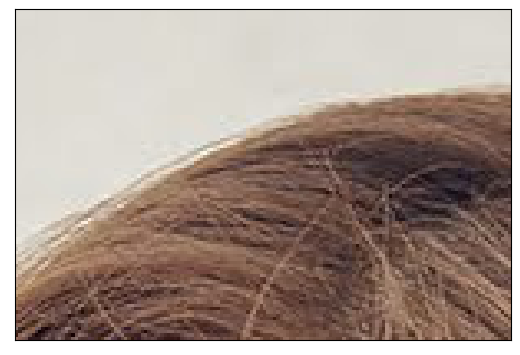

In [459]:
import cv2
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import matplotlib.pyplot as plt

# 이미지가 올라갈 원본이미지 부분을 잘라낸다.
rows, cols, channels = hat_img.shape
roi = img[0:rows+0, 250:cols+250]  #슬라이싱 할 때 변수에 담긴 수 활용
plt.xticks([]); plt.yticks([])
plt.imshow(roi)
# print(rows, cols)

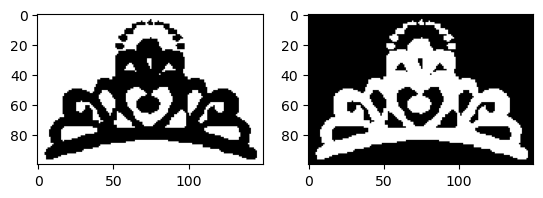

In [460]:
import cv2
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import matplotlib.pyplot as plt

hat_img_gray = cv2.cvtColor(hat_img, cv2.COLOR_BGR2GRAY)
_, hat_mask = cv2.threshold(hat_img_gray, 250, 255, cv2.THRESH_BINARY)
_, hat_mask_bin = cv2.threshold(hat_img_gray, 250, 255, cv2.THRESH_BINARY_INV) #INV반전이미지

plt.subplot(1,2,1)
plt.imshow(hat_mask, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(hat_mask_bin, cmap='gray')

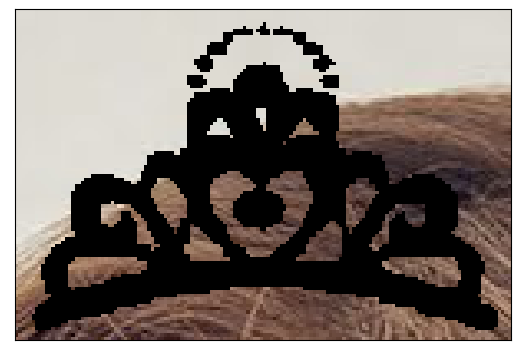

In [461]:
#이미지 합성 시 들어갈 자리 마크업

import cv2
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import matplotlib.pyplot as plt

img_bg = cv2.bitwise_and(roi, roi, mask=hat_mask)

plt.xticks([]); plt.yticks([])
plt.imshow(img_bg)
plt.show()

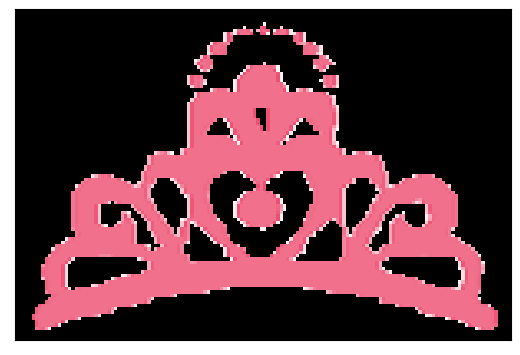

In [462]:
import cv2
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import matplotlib.pyplot as plt

#호랑이 이미지 에서 원본 이미지에 오라갈 부분만 추출
img_fg = cv2.bitwise_and(hat_img, hat_img, mask=hat_mask_bin)
plt.xticks([]); plt.yticks([])
plt.imshow(img_fg)
plt.show()

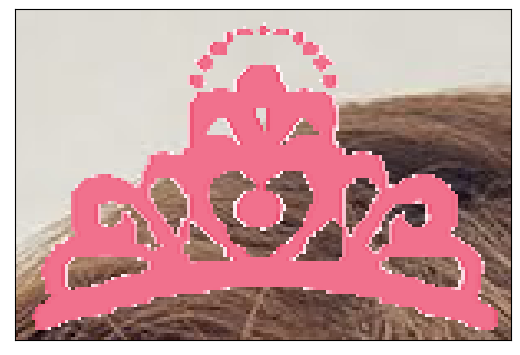

In [463]:
# bg_img에 fg_img 합성

img_bg = cv2.add(img_bg, img_fg)

plt.xticks([]); plt.yticks([])
plt.imshow(img_bg)
plt.show()

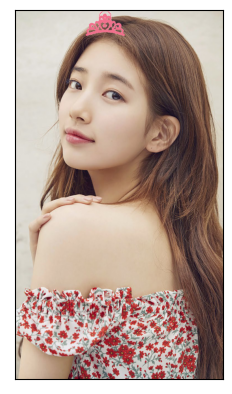

In [464]:
import cv2
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import matplotlib.pyplot as plt

rows, cols, channels = hat_img.shape
img[0:rows+0, 250:cols+250] = img_bg

plt.xticks([]); plt.yticks([])
# plt.title("KIA TIGERS")
plt.imshow(img)

<table border=1>
    <tr><td colspan=3 style="border: 1px solid black; width:600px; text-align: left;">
        <font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=2>○ 다음과 같이 2개의 이미지를 합성해보자.</font></td></tr> 
    <tr>
        <td style="border: 1px solid black;">
        <img src="./lecture_image/ryan_cap2.png" width=80%></td>        
    </tr>       
</table>

## 크로마 키(Chroma key) 합성

- 녹색 또는 파란색 배경에서 찰영한 영상에 다른 배경 영상을 합성하는 기술

In [14]:
#실습

In [15]:
#실습

In [16]:
#실습

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[6차시] 정리하기</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=2>
○ ROI (Region of Image) : 관심영역을 의미<br>
○ line() - 선그리기<br> 
○ circle() - 원 그리기<br> 
○ rectangle() - 사각형 그리기<br> 
○ ellipse() - 타원 그리기<br> 
○ putText() - 문자 출력<br>

○ bitwise_not() : 반전 연산<br>
○ bitwise_and() : AND 연산<br>
○ add() : 2개 이미지 합치기<br>

○ 크로마 키 합성 : 녹색 또는 파란색 배경에서 찰영한 영상에 다른 배경 영상을 합성하는 기술<br>

○ copyTo() : 녹색 영역에 다른 영역 배경을 합성하기            
        </font></td></tr>   
</table>